In [210]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import median, mean
from tensorflow.keras.optimizers import SGD

In [211]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, SimpleRNN
from keras.optimizers import Adam
from keras.utils import plot_model

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.callbacks import ModelCheckpoint # new!
import os # new!

In [212]:
# load data
df = pd.read_csv('solar_exposure.csv')
df



,Date,Year,Month_index,Day,Day_of_week,Day_of_year,Daily global solar exposure (MJ/m*m)
0,1/01/2015,2015,1,1,5,1,23.6
1,2/01/2015,2015,1,2,6,2,26.8
2,3/01/2015,2015,1,3,7,3,26.5
3,4/01/2015,2015,1,4,1,4,25.2
4,5/01/2015,2015,1,5,2,5,30.7
...,...,...,...,...,...,...,...
2246,24/02/2021,2021,2,24,4,55,23.3
2247,25/02/2021,2021,2,25,5,56,18.9
2248,26/02/2021,2021,2,26,6,57,15.7
2249,27/02/2021,2021,2,27,7,58,11.8


In [213]:
df['Daily global solar exposure (MJ/m*m)']

0       23.6
1       26.8
2       26.5
3       25.2
4       30.7
        ... 
2246    23.3
2247    18.9
2248    15.7
2249    11.8
2250    23.3
Name: Daily global solar exposure (MJ/m*m), Length: 2251, dtype: float64

original data


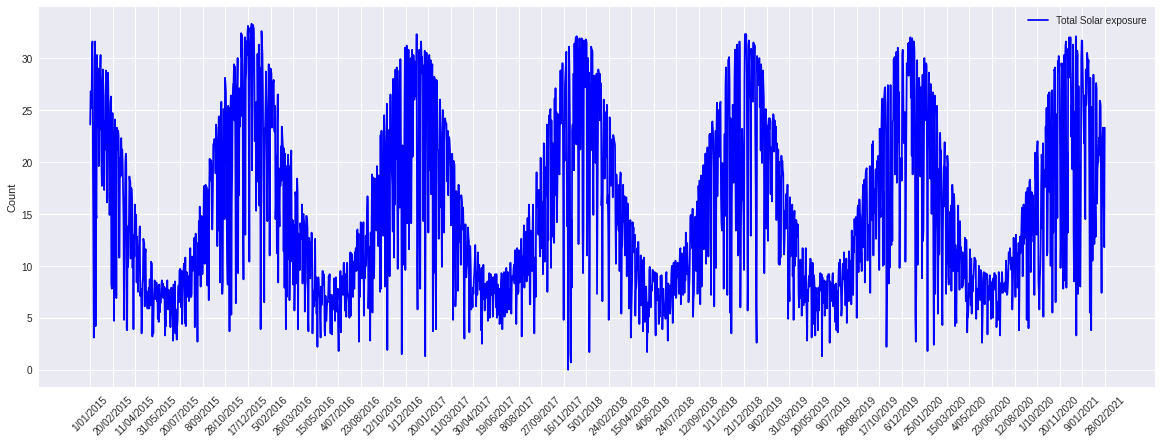

In [214]:
# show of the solar exposure per day
print('original data')
plt.figure(figsize = (20, 7))
plt.plot(range(len(df)),df['Daily global solar exposure (MJ/m*m)'], color='blue', label='Total Solar exposure')
plt.xticks(range(0,len(df),50),df['Date'].loc[::50],rotation=45)
plt.ylabel('Count')
plt.legend()
plt.show()

In [215]:
for col_name in df.columns:
    print('\nUnique value in column', col_name, 'is:\n')
    print(df[col_name].unique())
    print('\n-----------------\n')


Unique value in column Date is:

['1/01/2015' '2/01/2015' '3/01/2015' ... '26/02/2021' '27/02/2021'
 '28/02/2021']

-----------------


Unique value in column Year is:

[2015 2016 2017 2018 2019 2020 2021]

-----------------


Unique value in column Month_index is:

[ 1  2  3  4  5  6  7  8  9 10 11 12]

-----------------


Unique value in column Day is:

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

-----------------


Unique value in column Day_of_week is:

[5 6 7 1 2 3 4]

-----------------


Unique value in column Day_of_year is:

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 1

In [216]:
print(df.groupby('Year')['Daily global solar exposure (MJ/m*m)'].mean())

df.groupby('Year').agg({'Daily global solar exposure (MJ/m*m)':[sum,min,max]})

Year
2015    15.256712
2016    14.704098
2017    15.001644
2018    15.021644
2019    15.388493
2020    14.546175
2021    20.615254
Name: Daily global solar exposure (MJ/m*m), dtype: float64


Daily global solar exposure (MJ/m*m)           
                                      sum  min   max
Year                                                
2015                               5568.7  2.7  33.3
2016                               5381.7  1.5  32.6
2017                               5475.6  0.0  32.1
2018                               5482.9  1.7  32.3
2019                               5616.8  1.3  32.0
2020                               5323.9  1.8  32.1
2021                               1216.3  3.8  31.7

In [217]:
print(df.groupby('Month_index')['Daily global solar exposure (MJ/m*m)'].mean())

df.groupby('Month_index').agg({'Daily global solar exposure (MJ/m*m)':[sum,min,max]})

Month_index
1     23.193548
2     20.190909
3     15.810215
4     10.949444
5      7.867204
6      7.061667
7      7.601075
8      9.993011
9     13.909444
10    18.432258
11    20.789444
12    23.883871
Name: Daily global solar exposure (MJ/m*m), dtype: float64


Daily global solar exposure (MJ/m*m)           
                                             sum  min   max
Month_index                                                
1                                         5033.0  1.3  32.6
2                                         3997.8  1.8  29.4
3                                         2940.7  3.8  23.7
4                                         1970.9  3.0  18.4
5                                         1463.3  1.7  13.2
6                                         1271.1  1.3   9.6
7                                         1413.8  1.8  11.5
8                                         1858.7  2.7  15.9
9                                         2503.7  2.8  20.9
10                                        3428.4  1.9  28.1
11                                        3742.1  0.0  31.1
12                                        4442.4  0.7  33.3

In [218]:
print(df.groupby('Day_of_week')['Daily global solar exposure (MJ/m*m)'].mean())

df.groupby('Day_of_week').agg({'Daily global solar exposure (MJ/m*m)':[sum,min,max]})

Day_of_week
1    15.102795
2    15.099065
3    15.392523
4    15.500000
5    15.237888
6    14.718634
7    14.886646
Name: Daily global solar exposure (MJ/m*m), dtype: float64


Daily global solar exposure (MJ/m*m)           
                                             sum  min   max
Day_of_week                                                
1                                         4863.1  0.0  32.3
2                                         4846.8  2.6  33.2
3                                         4941.0  1.5  33.0
4                                         4975.5  1.3  32.8
5                                         4906.6  2.2  33.1
6                                         4739.4  1.3  33.3
7                                         4793.5  0.7  32.6

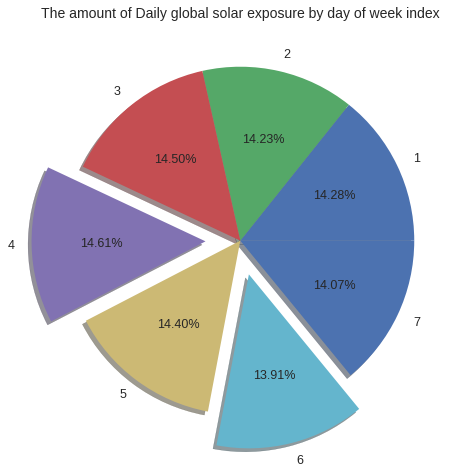

In [219]:
#exploring the data 
values = df.groupby(['Day_of_week'])['Daily global solar exposure (MJ/m*m)'].sum().values
labels = df.groupby(['Day_of_week'])['Daily global solar exposure (MJ/m*m)'].sum().index


plt.figure(1, figsize=(8,8))
plt.style.use('seaborn')
explode = [0.0, 0, 0 , 0.2, 0, 0.2, 0]
plt.pie(
       values, 
       labels = labels,
       shadow = True,
       autopct= '%0.2f%%',
       explode = explode,
       textprops={'fontsize':12.5}
)

plt.title('The amount of Daily global solar exposure by day of week index', fontsize =14)
plt.show()

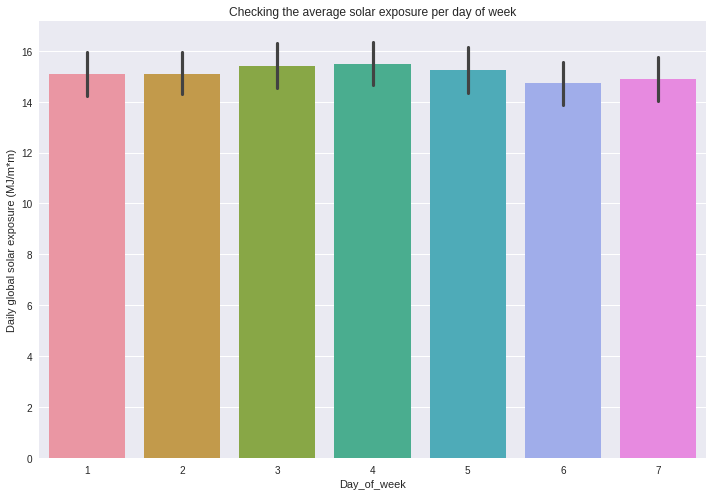

In [220]:
plt.figure(2,figsize=(10,7))
sns.barplot(x = 'Day_of_week', y='Daily global solar exposure (MJ/m*m)',data = df ,estimator= mean)

plt.title('Checking the average solar exposure per day of week')
plt.tight_layout()
plt.show()


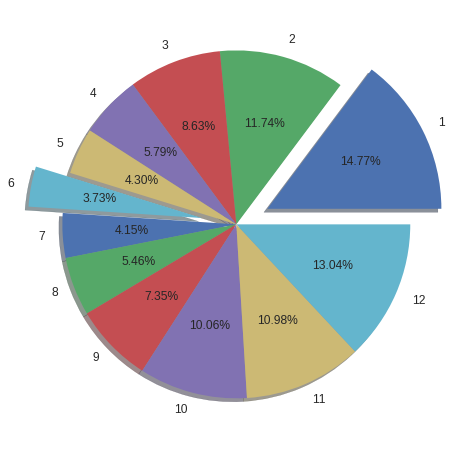

In [221]:
#checking the monthly visualisation of the solar exposure
values_month = df.groupby(['Month_index'])['Daily global solar exposure (MJ/m*m)'].sum().values
labels_month = df.groupby(['Month_index'])['Daily global solar exposure (MJ/m*m)'].sum().index

explode_2 = [0.2, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0]

plt.figure(figsize= (12,8))
plt.pie(
       values_month, 
       labels = labels_month,
       shadow = True,
       autopct= '%0.2f%%',
       explode = explode_2 ,
       textprops={'fontsize':12})


plt.show()


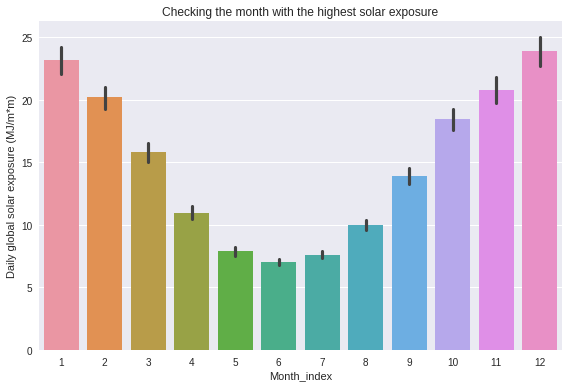

In [222]:
sns.barplot(x= 'Month_index', y= 'Daily global solar exposure (MJ/m*m)', data = df, estimator= mean)
plt.title('Checking the month with the highest solar exposure')
plt.tight_layout()
plt.show()

##Buidling a sequential NN

In [223]:
df.iloc[:,1:-1] # extracting features

,Year,Month_index,Day,Day_of_week,Day_of_year
0,2015,1,1,5,1
1,2015,1,2,6,2
2,2015,1,3,7,3
3,2015,1,4,1,4
4,2015,1,5,2,5
...,...,...,...,...,...
2246,2021,2,24,4,55
2247,2021,2,25,5,56
2248,2021,2,26,6,57
2249,2021,2,27,7,58


In [226]:
model1 = Sequential()

model1.add(Dense(32, input_dim=5, activation='relu'))
model1.add(BatchNormalization())

model1.add(Dense(16, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Dense(1, activation='linear'))

In [227]:
# Removing old logs
!rm -rf ./model_output

model1.compile(loss='mean_squared_error', optimizer=SGD(lr=0.00001) )

output_dir = 'model_output/'

run_name = 'regression_baseline'
output_path = output_dir + run_name

if not os.path.exists(output_path):
    os.makedirs(output_path)

modelcheckpoint = ModelCheckpoint(output_path + '/weights.{epoch:02d}.hdf5', # decimal integers
                                  save_weights_only=True)

In [228]:
X_train = df.iloc[:,1:-1].values
X_train.shape

(2251, 5)

In [229]:
#extracting the dependent variables
y_train = df.iloc[:,-1]
y_train

0       23.6
1       26.8
2       26.5
3       25.2
4       30.7
        ... 
2246    23.3
2247    18.9
2248    15.7
2249    11.8
2250    23.3
Name: Daily global solar exposure (MJ/m*m), Length: 2251, dtype: float64

In [230]:
#splitting the model into train and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3)

In [231]:
#fitting the model
history = model1.fit(X_train, y_train, 
          batch_size=32, epochs=500, verbose=1, 
          validation_data=(X_valid, y_valid),
          callbacks=[modelcheckpoint]) # val loss below 50 is good, 40 great

Epoch 1/500
50/50 [==============================] - 1s 6ms/step - loss: 306.3270 - val_loss: 1291.5181
Epoch 2/500
50/50 [==============================] - 0s 2ms/step - loss: 294.1583 - val_loss: 787.9711
Epoch 3/500
50/50 [==============================] - 0s 2ms/step - loss: 295.2109 - val_loss: 581.6426
Epoch 4/500
50/50 [==============================] - 0s 2ms/step - loss: 300.2752 - val_loss: 489.9170
Epoch 5/500
50/50 [==============================] - 0s 2ms/step - loss: 295.8039 - val_loss: 424.3285
Epoch 6/500
50/50 [==============================] - 0s 2ms/step - loss: 290.1956 - val_loss: 382.4027
Epoch 7/500
50/50 [==============================] - 0s 2ms/step - loss: 292.4121 - val_loss: 351.2026
Epoch 8/500
50/50 [==============================] - 0s 2ms/step - loss: 294.6795 - val_loss: 330.5898
Epoch 9/500
50/50 [==============================] - 0s 2ms/step - loss: 281.9477 - val_loss: 307.3199
Epoch 10/500
50/50 [==============================] - 0s 2ms/step - loss

In [25]:
#plotting the loss metric
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(
    rows=1, cols=1, subplot_titles=("Training and Validation loss")
)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(loss) + 1))

# Add traces
fig.add_trace(go.Scatter(x=epochs, y=loss,  name="Training Loss"))
fig.add_trace(go.Scatter(x=epochs, y=val_loss, name="Validation Loss"))

In [232]:
# load data actual data for solar exposure for March 2021 to April 14 2021 to be used as test data
df2 = pd.read_csv('Solar_test_set.csv')
df2 = df2.drop(columns=	'Unnamed: 7')
df2

,Date,Year,Month,Day,Day_of_week,Day_of_year,Daily global solar exposure (MJ/m*m)
0,1/03/2021,2021,3,1,2,60,15.2
1,2/03/2021,2021,3,2,3,61,13.6
2,3/03/2021,2021,3,3,4,62,12.3
3,4/03/2021,2021,3,4,5,63,9.8
4,5/03/2021,2021,3,5,6,64,13.8
5,6/03/2021,2021,3,6,7,65,22.3
6,7/03/2021,2021,3,7,1,66,17.1
7,8/03/2021,2021,3,8,2,67,5.3
8,9/03/2021,2021,3,9,3,68,14.7
9,10/03/2021,2021,3,10,4,69,20.2


original data


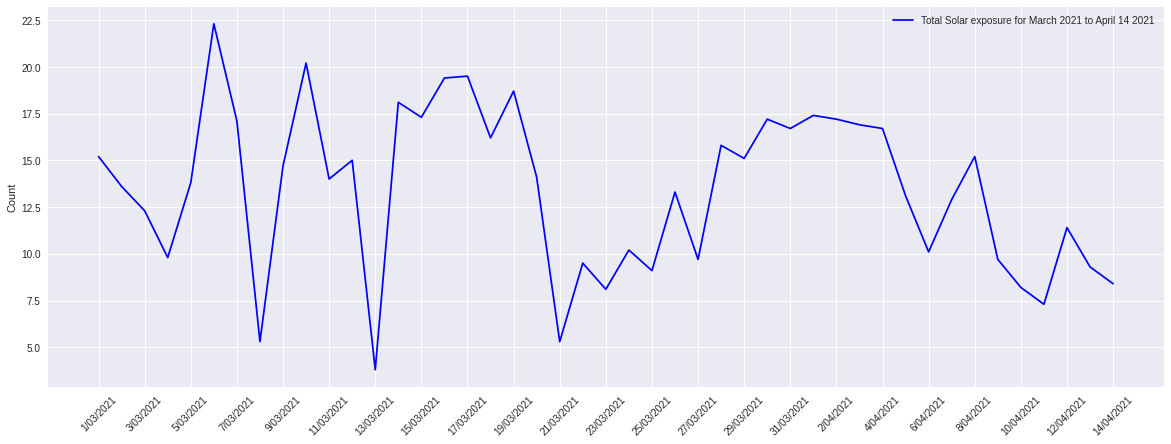

In [233]:
# show of the solar exposure from 
print('original data')
plt.figure(figsize = (20, 7))
plt.plot(df2['Date'],df2['Daily global solar exposure (MJ/m*m)'], color='blue', label='Total Solar exposure for March 2021 to April 14 2021')
plt.xticks(range(0,len(df2),2),df2['Date'].loc[::2],rotation=45)
plt.ylabel('Count')
plt.legend()
plt.show()

In [29]:
#extracting the features in the test set from the March 2021 to April 14 2021 data 
#enable us predict the solar exposure for the same period and check model validity
test_set = df2.iloc[:,1:-1].values
test_set.shape

(45, 5)

In [30]:
#predicting the values for  March 2021 to April 14 2021 and inserting it into 
#the dataframe
df2['Predicted_values'] = model.predict(np.reshape(test_set, [45, 5]))

In [31]:
df2

,Date,Year,Month,Day,Day_of_week,Day_of_year,Daily global solar exposure (MJ/m*m),Predicted_values
0,1/03/2021,2021,3,1,2,60,15.2,15.787395
1,2/03/2021,2021,3,2,3,61,13.6,15.671041
2,3/03/2021,2021,3,3,4,62,12.3,15.554707
3,4/03/2021,2021,3,4,5,63,9.8,15.438349
4,5/03/2021,2021,3,5,6,64,13.8,15.321978
5,6/03/2021,2021,3,6,7,65,22.3,15.205584
6,7/03/2021,2021,3,7,1,66,17.1,15.791552
7,8/03/2021,2021,3,8,2,67,5.3,15.675222
8,9/03/2021,2021,3,9,3,68,14.7,15.558892
9,10/03/2021,2021,3,10,4,69,20.2,15.442497


original data


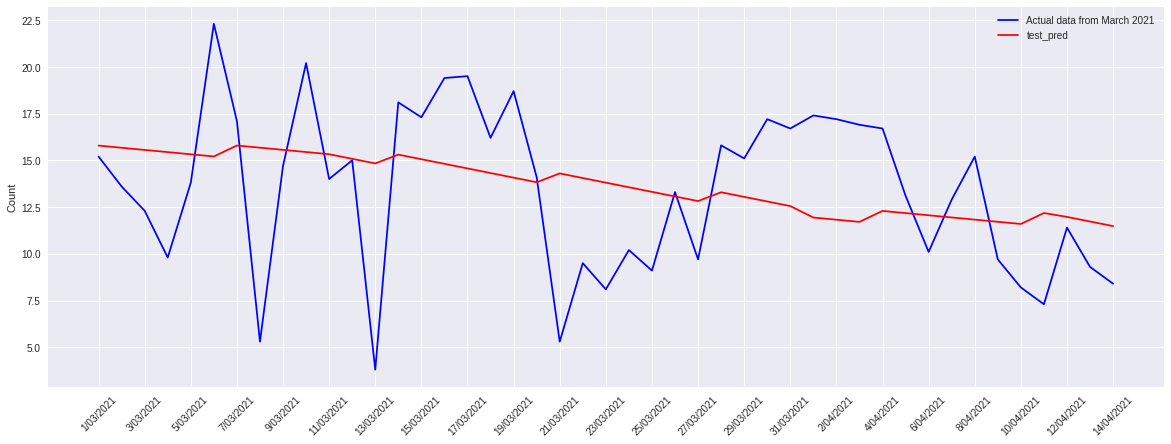

In [32]:
#Plotting both predicted the 
print('original data')
plt.figure(figsize = (20, 7))
plt.plot(df2['Date'],df2['Daily global solar exposure (MJ/m*m)'], color='blue', label='Actual data from March 2021')
plt.plot(df2['Predicted_values'] ,color='r',label='test_pred')

plt.xticks(range(0,len(df2),2),df2['Date'].loc[::2],rotation=45)
plt.ylabel('Count')
plt.legend()
plt.show()

#LSTM Model

In [344]:
#getting the solar exposure values
df_lstm = df['Daily global solar exposure (MJ/m*m)'].values
df_lstm

array([23.6, 26.8, 26.5, ..., 15.7, 11.8, 23.3])

In [345]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# choose a number of time steps
n_steps = 185
# split into samples
X, y = split_sequence(df_lstm, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])


Streaming output truncated to the last 5000 lines.
 15.2 17.1 25.4 21.6  5.4 10.6 19.3 11.1 17.6 22.8 20.8 21.1 15.9  7.1
  4.3 12.7 17.1] 19.5
[10.4 11.3  9.5 14.4 16.1 17.8 11.8 14.  18.3  8.4 17.7 19.  19.2 19.4
 14.4 10.5 13.6 13.9 13.3 13.1 19.6  7.4 17.7 19.  14.4 21.7 18.5 22.
 11.  17.4 17.4 15.1 17.  19.3 12.6 17.5 20.1 19.6 20.2 20.6 11.4  9.6
 23.2 15.8 14.7 19.6 23.7 26.  26.1 10.  17.2 10.1 26.3 27.  27.2 25.5
 22.8  2.2  7.8 11.2 27.4 19.9  8.3 16.1  9.8 13.5 27.4 12.7 12.  19.7
 12.4 23.9 24.1 29.9 27.9 30.1 18.8 28.3 24.6 30.6 18.  22.2 31.  30.7
 21.9 26.7  9.8 18.2 19.2 20.3 20.4 18.2 30.3 30.8 28.6 22.2 21.8 22.7
 24.8 10.4 16.4 21.7 29.5 29.3 29.3 31.4 28.3 31.5 29.2 31.4 32.  26.2
 31.6 20.6 31.9 18.8 29.3 31.6 31.6 30.7 22.8  5.1  2.7  7.7 26.9 29.8
 10.1 18.2 21.9 28.1 27.4 20.8 18.6 24.4 27.2 23.9  8.8 28.4 12.4 13.4
 20.6 30.  24.  26.1 26.5 29.5 29.3 18.3  1.8 21.  22.7 28.6 27.1 25.
 18.4 27.5 19.9 15.  19.1 17.3 26.7 10.6  2.4 23.8 26.4  7.3 12.9 15.2
 17.1 

In [321]:
# # split into train test sets
# from sklearn.model_selection import train_test_split
# X, val_X, y, val_y = train_test_split(X, y, test_size = 0.3)

In [ ]:
val_x

In [346]:
model2 = Sequential()
model2.add(LSTM(units=96, return_sequences=True, input_shape=(n_steps, 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=96, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=96, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=96))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))

In [347]:
model2.compile(optimizer='adam', loss='mse')

In [348]:
# Removing old logs
!rm -rf ./model_output

output_dir = 'model_output/'

run_name = 'regression_baseline'
output_path = output_dir + run_name

if not os.path.exists(output_path):
    os.makedirs(output_path)

modelcheckpoint = ModelCheckpoint(output_path + '/weights.{epoch:02d}.hdf5', # decimal integers
                                  save_weights_only=True)

In [349]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [350]:
model2.fit(X, y, epochs=40, batch_size=32, verbose = 1, callbacks=[modelcheckpoint])

Epoch 1/40
65/65 [==============================] - 36s 470ms/step - loss: 143.8567
Epoch 2/40
65/65 [==============================] - 32s 491ms/step - loss: 67.2801
Epoch 3/40
65/65 [==============================] - 32s 492ms/step - loss: 64.1975
Epoch 4/40
65/65 [==============================] - 32s 494ms/step - loss: 64.6547
Epoch 5/40
65/65 [==============================] - 32s 496ms/step - loss: 59.0138
Epoch 6/40
65/65 [==============================] - 33s 506ms/step - loss: 32.5324
Epoch 7/40
65/65 [==============================] - 32s 499ms/step - loss: 31.2540
Epoch 8/40
65/65 [==============================] - 32s 497ms/step - loss: 30.5393
Epoch 9/40
65/65 [==============================] - 32s 497ms/step - loss: 32.9913
Epoch 10/40
65/65 [==============================] - 32s 500ms/step - loss: 31.3007
Epoch 11/40
65/65 [==============================] - 32s 499ms/step - loss: 31.6080
Epoch 12/40
65/65 [==============================] - 33s 500ms/step - loss: 29.5249


In [351]:
model2.load_weights(output_path + '/weights.36.hdf5')

In [330]:
len(y)

1446

In [352]:
# demonstrate prediction for next 10 days
x_input = y[1881:2067]
temp_input=list(x_input)
lst_output=[]
i=0
while(i<185):
    
    if(len(temp_input)>185):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

Streaming output truncated to the last 5000 lines.
 17.1        22.1        23.3        18.9        15.7        11.8
 23.3        18.41795731 17.50028801 17.02347755 16.96634483 16.83705902
 16.60729599 16.39079857 16.19961929 16.00971603 15.81366539 15.61057663
 15.38813972 15.13615417 14.85938835 14.57345963 14.28928852 14.02589035
 13.79098988 13.5878067  13.41819    13.27713585 13.15519047 13.03927994
 12.92776585 12.82444191 12.73403454 12.65167618 12.55430222]
28 day output [[12.409647]]
29 day input [15.         20.9        18.3        18.4        13.         21.2
 22.         19.8         8.4         7.3         5.8         8.6
  9.7        12.1        17.7        20.7        20.         13.6
 21.8         5.1        18.2        17.8        19.2        17.6
 23.4        20.5        25.2        11.         11.3        17.2
 26.5        20.1        26.7        17.1        21.         10.
 23.2        26.8        26.9         5.5        23.1        13.2
 22.9        28.9        28

In [353]:
# load data
df_updated = pd.read_csv('solar_exposure_updated.csv')


In [354]:
df_updated

,Date,Data_cat,Year,Month_index,Day,Day_of_week,Day_of_year,Daily global solar exposure (MJ/m*m)
0,1/01/2015,Actual,2015,1,1,5,1,23.6
1,2/01/2015,Actual,2015,1,2,6,2,26.8
2,3/01/2015,Actual,2015,1,3,7,3,26.5
3,4/01/2015,Actual,2015,1,4,1,4,25.2
4,5/01/2015,Actual,2015,1,5,2,5,30.7
...,...,...,...,...,...,...,...,...
2430,27/08/2021,Predicted,2021,8,27,6,239,NaN
2431,28/08/2021,Predicted,2021,8,28,7,240,NaN
2432,29/08/2021,Predicted,2021,8,29,1,241,NaN
2433,30/08/2021,Predicted,2021,8,30,2,242,NaN


In [355]:
df_updated[2251:]['Daily global solar exposure (MJ/m*m)'] = lst_output[1:185]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [356]:
import plotly.express as px

fig = px.scatter(df_updated, x="Date", y="Daily global solar exposure (MJ/m*m)", color="Data_cat",
                 size='Daily global solar exposure (MJ/m*m)', hover_data=['Daily global solar exposure (MJ/m*m)'],title="Solar Exposure Scatter plot", width=1500, height=600)
fig.show()

In [357]:
df_updated

,Date,Data_cat,Year,Month_index,Day,Day_of_week,Day_of_year,Daily global solar exposure (MJ/m*m)
0,1/01/2015,Actual,2015,1,1,5,1,23.600000
1,2/01/2015,Actual,2015,1,2,6,2,26.800000
2,3/01/2015,Actual,2015,1,3,7,3,26.500000
3,4/01/2015,Actual,2015,1,4,1,4,25.200000
4,5/01/2015,Actual,2015,1,5,2,5,30.700000
...,...,...,...,...,...,...,...,...
2430,27/08/2021,Predicted,2021,8,27,6,239,12.161574
2431,28/08/2021,Predicted,2021,8,28,7,240,12.163382
2432,29/08/2021,Predicted,2021,8,29,1,241,12.165101
2433,30/08/2021,Predicted,2021,8,30,2,242,12.166721


In [360]:
df_updated.to_csv("/content/final_solar_exposure_dataset.csv")